<a href="https://colab.research.google.com/github/ryuuunothuman/PCVK_Ganjil_2024/blob/master/Week5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TUGAS PRAKTIKUM

1. Buat Gamma Correction sesuai dengan petunjuk berikut\
Percobaan ini akan meminta anda membuat Gamma Correction. Pada percobaan ini, nilai
Gamma akan diset dengan meminta masukan dari pengguna. Berikut adalah kode untuk
meminta masukan nilai dari pengguna. Lanjutkan kode tersebut dengan membuat image
dengan gamma correction sesuai rumus yang telah diberikan.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Gamma Correction pada citra
-----------------------------
Masukkan nilai Gamma: 3


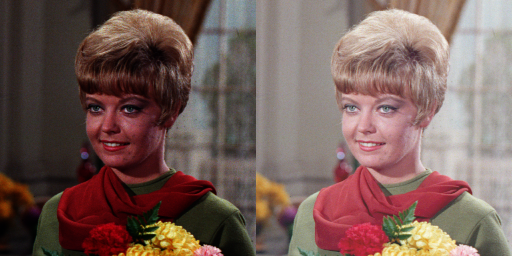

In [2]:
import cv2 as cv
import numpy as np
from google.colab.patches import cv2_imshow

# Membuat fungsi untuk Gamma Correction pada citra
def gamma_correction(img, gamma):
    normalized = img / 255.0
    corrected = np.power(normalized, 1.0 / gamma)
    return np.uint8(corrected * 255)

print('Gamma Correction pada citra')
print('-----------------------------')

try:
    gamma = float(input('Masukkan nilai Gamma: '))
except ValueError:
    print('Error, not a number')
    gamma = 1.0  # nilai default jika input salah

# Membaca gambar asli
original = cv.imread('/content/drive/MyDrive/images/female.tiff')

# Memeriksa apakah gambar berhasil dimuat
if original is None:
    print("Gambar tidak ditemukan.")
else:
    # Menerapkan Gamma Correction
    gamma_img = gamma_correction(original, gamma)

    # Menggabungkan gambar asli dan hasil koreksi gamma
    final_frame = cv.hconcat([original, gamma_img])

    # Menampilkan gambar asli dan hasil koreksi gamma
    cv2_imshow(final_frame)

2. Buat Simulasi Image Depth\
Percobaan ini digunakan sebagai simulasi dari proses kuantisasi citra. Pada kuantisasi citra,
pixel dapat direpresentasikan dengan n-bit kedalaman (default menggunakan 8-bit). Pada
pixel 8-bit, warna yang memungkinkan adalah 256 warna, dari 0 (0000 0000) hingga
255(1111 1111). Pada pixel 7-bit, warna yang memungkinkan adalah 128 warna, dari 0 (000
0000) hingga 127 (111 1111). Kemungkinan warna didapat dari pangkat 2 jumlah bit. Jika
7bit, maka jumlah warnanya adalah 27 = 128, dst.

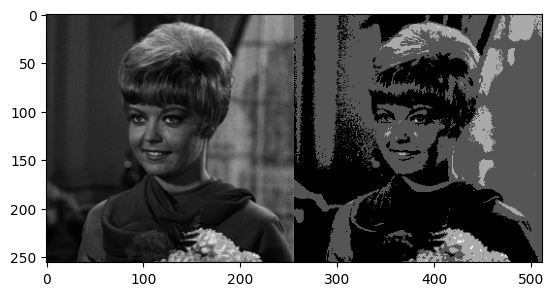

In [3]:
from matplotlib import pyplot as plt

bit_depth = 2
level = 255 / (pow(2, bit_depth)-1)
original = cv.imread('/content/drive/MyDrive/images/female.tiff', cv.IMREAD_GRAYSCALE)
depth_image = np.zeros(original.shape, original.dtype)

for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    depth_image[y, x] = np.round(original[y, x] / level) * level

final_frame = cv.hconcat([original, depth_image])
plt.imshow(final_frame, cmap='gray')

3. Buat modul Average Denoising\
Buat modul average denoising sesuai dengan rumus yang telah diberikan pada sub bab sebelumnya. Citra asli sudah disediakan pada /images/galaxy.jpg. 100 Citra dengan Gaussian Noise sudah disediakan pada /images/noises/*.jpg Anda dapat menggunakan code berikut untuk membaca semua image dalam satu folder , gunakan modul glob (import glob).

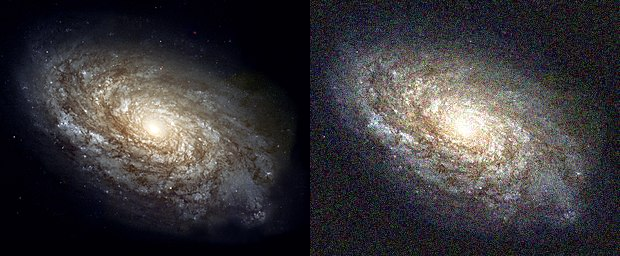

In [5]:
import glob

galaxy = cv.imread('/content/drive/MyDrive/images/galaxy.jpg')
cv_img = []
for img in glob.glob('/content/drive/MyDrive/images/noises/*.jpg'):
  n = cv.imread(img)
  cv_img.append(n)

final_frame = cv.hconcat([galaxy, cv_img[0]])
cv2_imshow(final_frame)

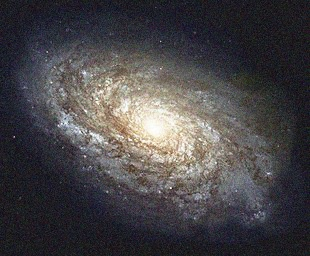

Jumlah Citra:  5
PSNR:  19.414217874021478


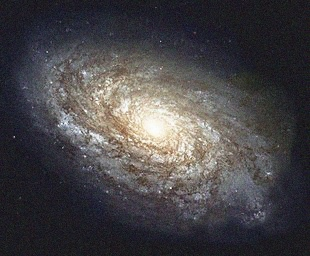

Jumlah Citra:  10
PSNR:  19.59282471765089


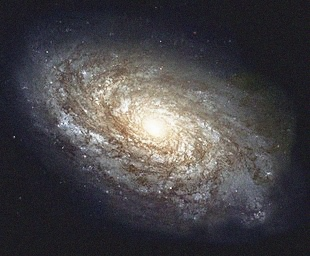

Jumlah Citra:  20
PSNR:  19.68332181416677


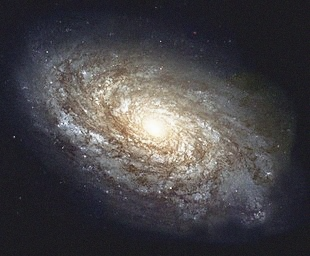

Jumlah Citra:  40
PSNR:  19.73226629272221


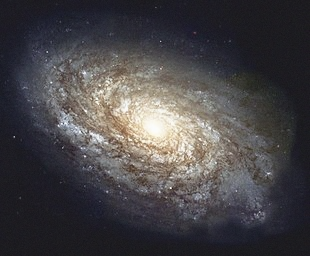

Jumlah Citra:  80
PSNR:  19.753178029252638


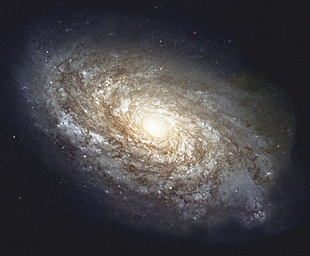

Jumlah Citra:  100
PSNR:  19.758317288501708


In [6]:
from math import sqrt, log10

def PSNR(img1, img2):
  mse = np.mean((img1 - img2) ** 2)
  if (mse == 0): # MSE 0 maka tidak ada noise sama sekali, sehingga PSNR tidak memiliki arti
    return 100
  max_pixel = 255.0
  psnr = 20 * log10(max_pixel / sqrt(mse))
  return psnr

def image_averaging(list_img, total_img):
  avg_img = np.zeros(list_img[0].shape)
  for i in range(total_img):
    avg_img += list_img[i]

  avg_img /= total_img
  return avg_img

jumlah_citra = np.array([5, 10, 20, 40, 80, 100])

list_denoised_image = []
for i in jumlah_citra:
  denoised_img = image_averaging(cv_img, i)
  list_denoised_image.append(denoised_img)
  cv2_imshow(denoised_img)
  print('Jumlah Citra: ', i)
  print('PSNR: ', PSNR(galaxy, denoised_img))

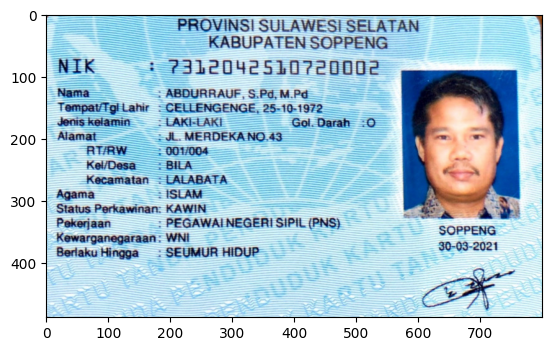

In [7]:
ktp = cv.imread('/content/drive/MyDrive/images/KTP7.jpeg')

plt.imshow(cv.cvtColor(ktp, cv.COLOR_BGR2RGB))

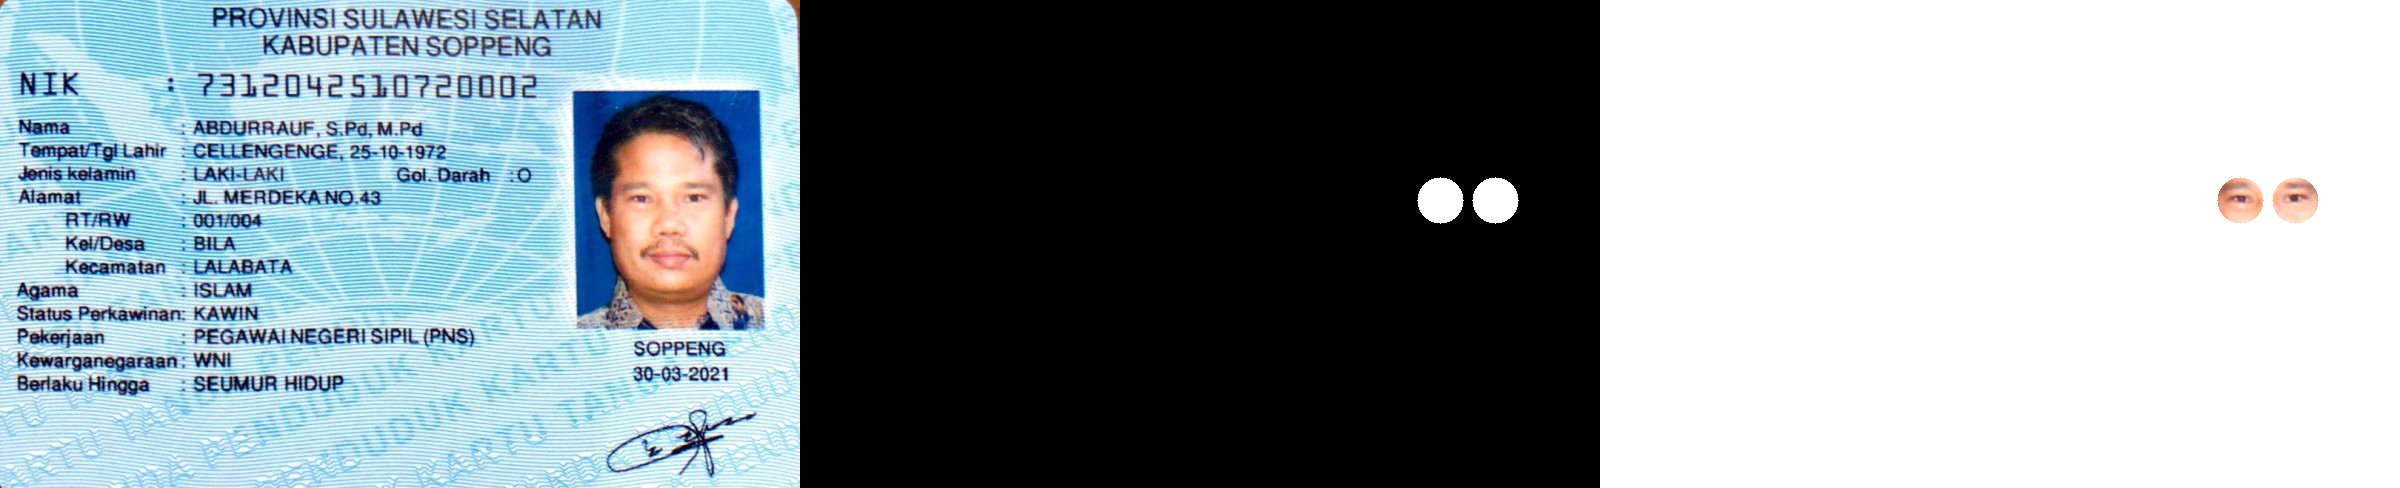

In [20]:
# KELOMPOK 5
circle_mask = np.zeros(ktp.shape[:2], dtype="uint8")

cv.circle(circle_mask, (640, 200), 23, 255, -1)
cv.circle(circle_mask, (695, 200), 23, 255, -1)

# Invers masker (bagian putih jadi hitam dan sebaliknya)
inverse_mask = cv.bitwise_not(circle_mask)

# Buat gambar putih
white_background = np.ones_like(ktp) * 255

# Masker ktp untuk bagian lingkaran
ktp_and = cv.bitwise_and(ktp, ktp, mask=circle_mask)

# Masker putih untuk bagian hitam
white_part = cv.bitwise_and(white_background, white_background, mask=inverse_mask)

# Gabungkan hasil KTP dengan bagian putih
final_result = cv.add(ktp_and, white_part)

# Tampilkan hasil
frame = cv.hconcat([ktp,cv.cvtColor(circle_mask, cv.COLOR_GRAY2BGR),final_result])
cv2_imshow(frame)

5. Lakukan percobaan menggunakan operator lain dan tunjukkan hasilnya pada modul ini. Tuliskan hasil analisa anda kenapa citra keluarannya seperti itu.

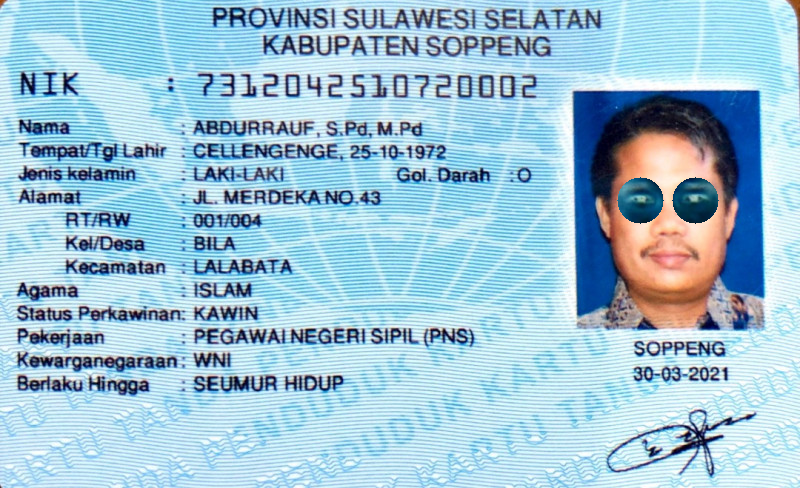

In [21]:
# Operator NOT

ktp_not = cv.bitwise_not(ktp,ktp.copy(),mask=circle_mask)
cv2_imshow(ktp_not)

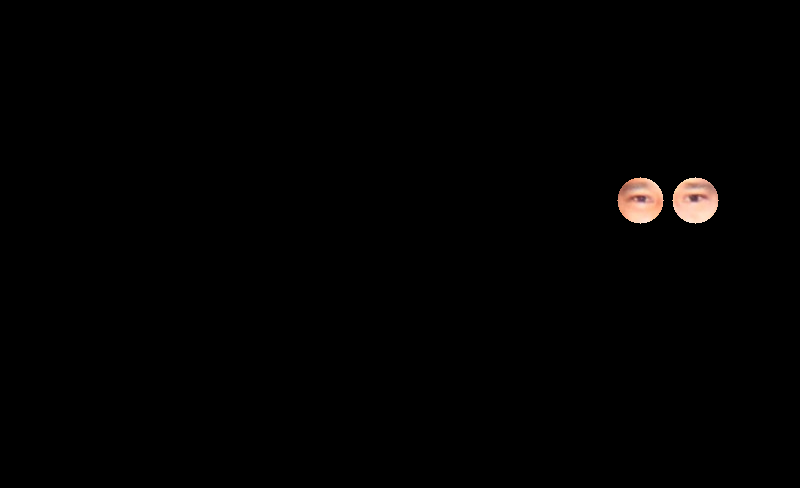

In [22]:
# Operator OR

ktp_or = cv.bitwise_or(ktp,ktp.copy(),mask=circle_mask)
cv2_imshow(ktp_or)

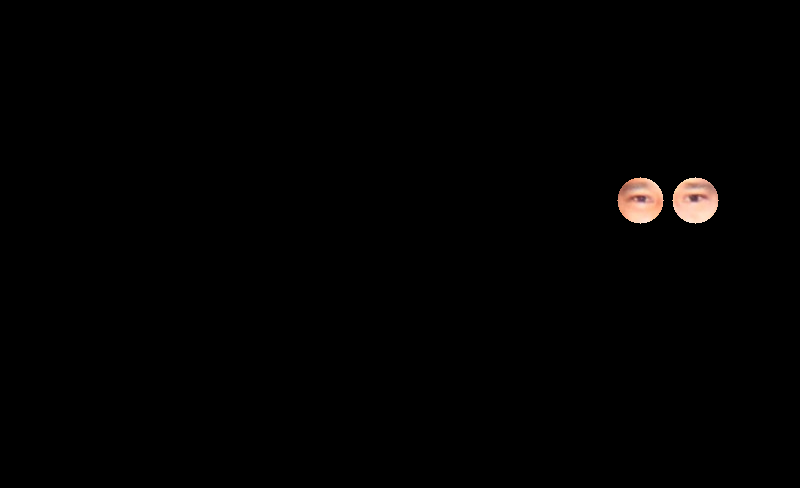

In [23]:
# Operator AND

ktp_and = cv.bitwise_and(ktp,ktp.copy(),mask=circle_mask)
cv2_imshow(ktp_and)

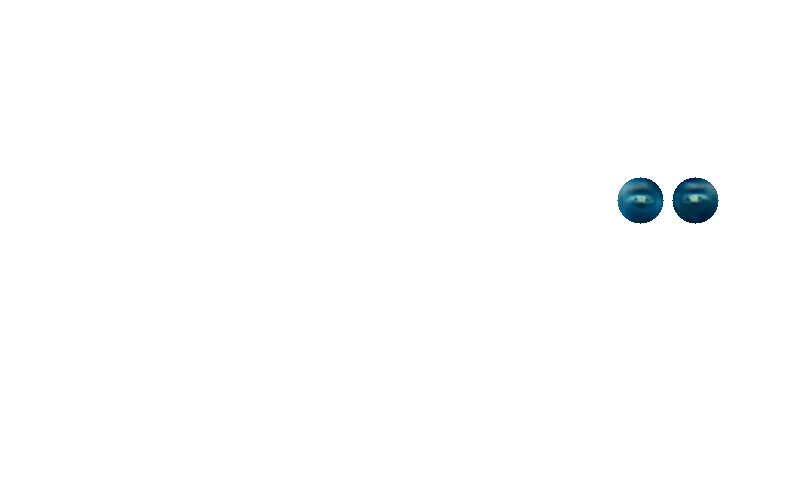

In [24]:
# Operator NAND

ktp_nand = cv.bitwise_not(cv.bitwise_and(ktp,ktp.copy(),mask=circle_mask))
cv2_imshow(ktp_nand)

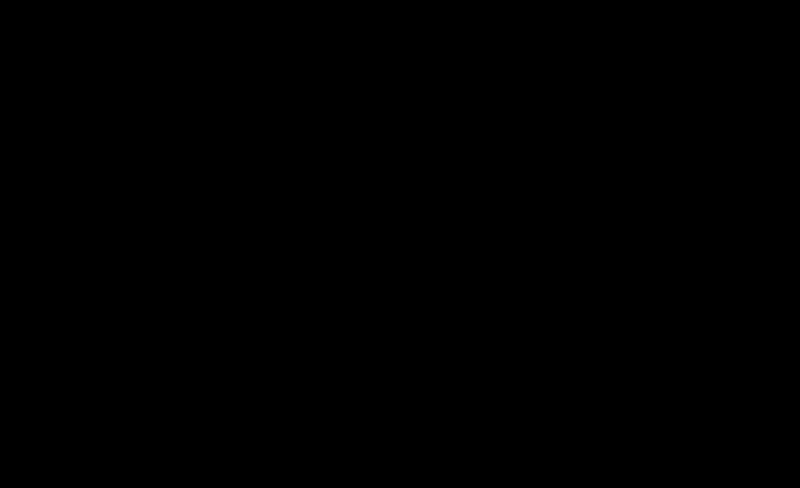

In [25]:
# Operator XOR

ktp_xor = cv.bitwise_xor(ktp,ktp.copy(),mask=circle_mask)
cv2_imshow(ktp_xor)